<img src='image1.jpg'>

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

Kaggle - https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/data

Data size - 3,72,450 rows and 785 column

In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(372450, 785)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


## creating x and y

In [4]:
X = data.drop('0',axis = 1)
y = data['0']

## Splitting data into training and testing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Reshaping data from 784 columns to 28x28 pixels

In [6]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


## Shuffle the training data

In [7]:
shuffle_data = shuffle(x_train)

## Visualizing training data

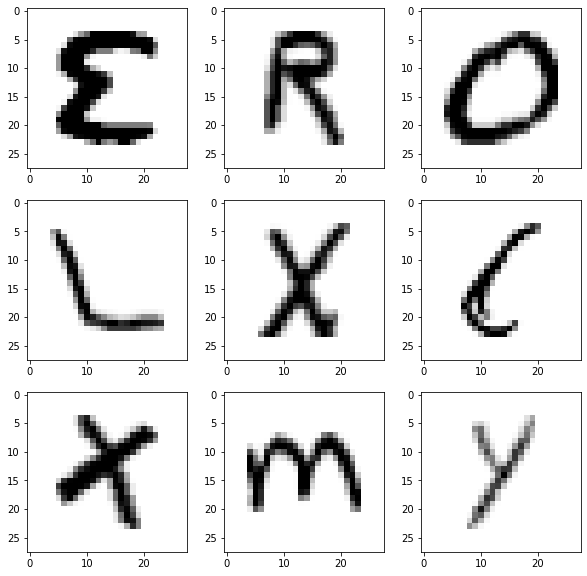

In [8]:
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

## Again Reshapping data

In [9]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


## Converting data 

In [10]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

## CNN Model Building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dropout

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [14]:
model.add(MaxPooling2D((2, 2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(128, activation='relu'))

In [17]:
model.add(Dropout(0.5))

In [18]:
model.add(Dense(26, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [20]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
hist_1 = model.fit(x_train, y_training, epochs=3,  validation_data = (x_test,y_testing))

Epoch 1/3
9312/9312 [==============================] - 370s 39ms/step - loss: 0.9530 - accuracy: 0.7283 - val_loss: 0.1543 - val_accuracy: 0.9579
Epoch 2/3
9312/9312 [==============================] - 362s 39ms/step - loss: 0.2986 - accuracy: 0.9144 - val_loss: 0.1249 - val_accuracy: 0.9665
Epoch 3/3
9312/9312 [==============================] - 380s 41ms/step - loss: 0.2440 - accuracy: 0.9312 - val_loss: 0.1069 - val_accuracy: 0.9708


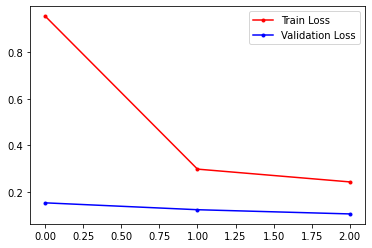

In [22]:
fig, ax = plt.subplots()
ax.plot(hist_1.history['loss'], 'r', marker='.', label='Train Loss')
ax.plot(hist_1.history['val_loss'], 'b', marker='.', label='Validation Loss')
ax.legend()

<img src='image2.jpg'>

In [23]:
model.save(r'handwritten_character_recog_model.h5')

In [24]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

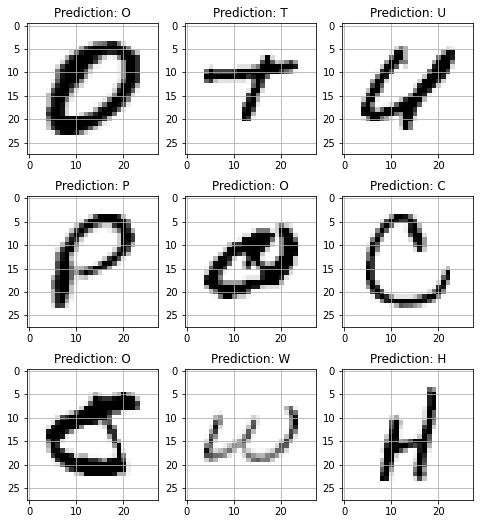

In [25]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [58]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys
 
# Loading the saved model
from keras.models import load_model
model = load_model('handwritten_character_recog_model.h5')


#loading image for prediction using openCV library
image = cv2.imread('E.png')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
 
final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))
 
prediction = words[np.argmax(model.predict(final_image))]
 
cv2.putText(image, "Model Predicted as: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 0.9, color = (255,0,0))
cv2.imshow('Handwritten character recognition ', image)

while True:
    k = cv2.waitKey(1) & 0xFF
    if k == 27:      # Escape key
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 108ms/step
